# Opening a New Coffee Shop in Toronto,Canada

# Methodology:
- Firstly,web scraping the Toronto data from Wikipedia page
- Secondly,Extracted the geographical coordinates of each neighborhood and generated maps to visualize the neighborhoods and how they cluster together
- Thridly, Obtain the venue data for the neighborhoods from Foursquare API
- Then find the total numbers of coffee shops in each borough/neighborhood
- Finally, select the best place to open a new coffee shop
***
### 1. Import libraries


In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
#!pip install geocoder
import geocoder
import os
#!pip install folium
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


print('Libraries imported.')


Libraries imported.


### 2. web scraping the Toronto data from Wikipedia page


In [11]:
#scrapping neighborhoods in Canada
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')

In [12]:
column_names = ['Postalcode', 'Borough', 'Neighborhood']

gta = pd.DataFrame(columns=column_names)

content =soup.find('div', class_='mw-parser-output')
table = content.table.tbody
postcode = 0
borough = 0
neighborhood = 0

for tr in table.find_all('tr'):
    i = 0
    for td in tr.find_all('td'):
        if i == 0:
            postcode = td.text.strip('\n')
            i = i + 1
        elif i == 1:
            borough = td.text.strip('\n')
            i = i + 1
        elif i == 2: 
            neighborhood = td.text.strip('\n').replace(']','')
    gta = gta.append({'Postalcode': postcode,'Borough': borough,'Neighborhood': neighborhood},ignore_index=True)

In [13]:
gta = gta[gta.Borough!= 0]
gta = gta[gta.Borough != 'Not assigned']
gta.index = range(len(gta))

### Combining by the Postalcode

In [14]:
gta = gta.groupby(['Postalcode','Borough']).agg(','.join)
gta = gta.reset_index(level=['Postalcode', 'Borough'])
gta.head(10)

,Postalcode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


### Extracted the geographical coordinates of each neighborhood 

In [15]:
def get_latilong(postal_code):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(postal_code))
        lati_long_coords = g.latlng
    return lati_long_coords

In [16]:
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [17]:
coords = [ get_latlng(neighborhood) for neighborhood in gta["Neighborhood"].tolist() ]

In [18]:
coords

[[43.81023000000005, -79.22037999999998],
 [43.789480000000026, -79.17613999999998],
 [43.766032820796575, -79.18538886171193],
 [43.767480000000035, -79.22828999999996],
 [43.747740961533395, -79.23517827086341],
 [43.738650000000064, -79.21698999999995],
 [43.71357596734874, -79.26034393370531],
 [43.72751000000005, -79.28274999999996],
 [43.738650000000064, -79.21698999999995],
 [43.694720000000075, -79.26459999999997],
 [43.737040000000036, -79.27693999999997],
 [43.74860000000007, -79.29801999999995],
 [43.78626000000003, -79.28083999999996],
 [43.78643000000005, -79.30155999999994],
 [43.812310000000025, -79.32153999999997],
 [43.79861815260895, -79.30883671057614],
 [43.80927938589406, -79.18769371605126],
 [43.803030000000035, -79.35345999999998],
 [43.772290000000055, -79.34085999999996],
 [43.777100000000075, -79.37956999999994],
 [43.75763000000006, -79.37118999999996],
 [43.79036719630047, -79.410854302354],
 [43.77094195854672, -79.40260722961315],
 [43.744158943504665, -7

In [19]:
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [20]:
gta['Latitude'] = df_coords['Latitude']
gta['Longitude'] = df_coords['Longitude']

In [21]:
print(gta.shape)
gta

(103, 5)


,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.810230,-79.220380
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.789480,-79.176140
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.766033,-79.185389
3,M1G,Scarborough,Woburn,43.767480,-79.228290
4,M1H,Scarborough,Cedarbrae,43.747741,-79.235178
5,M1J,Scarborough,Scarborough Village,43.738650,-79.216990
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.713576,-79.260344
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.727510,-79.282750
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.738650,-79.216990
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.694720,-79.264600


In [95]:
gta.to_csv("gta3.csv", index=False)

### The above result shows that there are 103 different Neighborhoods in Toronto

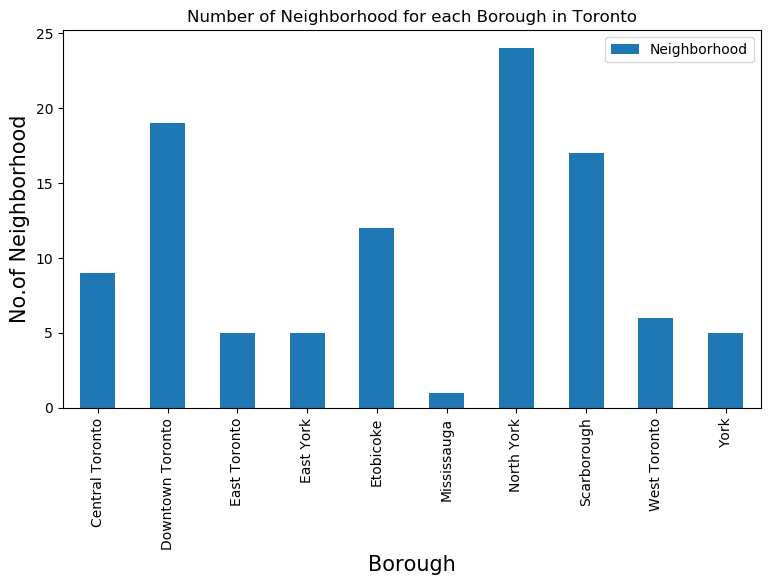

In [22]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in Toronto')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
gta.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

Get the coordinates of Toronto

In [92]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="tot-exp")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, Ontario {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, Ontario 43.6534817, -79.3839347.


In [93]:
map_tot = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(gta['Latitude'], gta['Longitude'], gta['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_tot)  
    
map_tot

In [94]:
map_tot.save('map_tot.html')

### 3. Obtain the venue data for the neighborhoods from Foursquare API

In [28]:
# define Foursquare Credentials and Version
CLIENT_ID = '5CLNLGDXYOVO4QNHKISOVYX5E3UDZXRDVG53WYV4ENXWJGSC' # your Foursquare ID
CLIENT_SECRET = 'P4GRSJKQ3LGIGEPCP3UD0K2011421JFNXGK4IDWSMSMJFIBM' # your Foursquare Secret
VERSION = '20201215' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5CLNLGDXYOVO4QNHKISOVYX5E3UDZXRDVG53WYV4ENXWJGSC
CLIENT_SECRET:P4GRSJKQ3LGIGEPCP3UD0K2011421JFNXGK4IDWSMSMJFIBM


In [56]:
radius = 2000
LIMIT = 100

venues = []

for lat, long, neighborhood,borough in zip(gta['Latitude'], gta['Longitude'], gta['Neighborhood'], gta['Borough']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            borough,
            neighborhood,
            #lat, 
            #long, 
            venue['venue']['name'], 
            #venue['venue']['location']['lat'], 
            #venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [57]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Borough','Neighborhood','VenueName', 'VenueCategory']


print(venues_df.shape)
venues_df.head()

(8548, 4)


,Borough,Neighborhood,VenueName,VenueCategory
0,Scarborough,"Malvern, Rouge",Shoppers Drug Mart,Pharmacy
1,Scarborough,"Malvern, Rouge",Malvern Arena,Skating Rink
2,Scarborough,"Malvern, Rouge",Subway,Sandwich Place
3,Scarborough,"Malvern, Rouge",Images Salon & Spa,Spa
4,Scarborough,"Malvern, Rouge",Lindt Outlet Boutique,Chocolate Shop


In [76]:
coffeeshops=venues_df[venues_df['VenueCategory']=='Coffee Shop']

In [77]:
coffeeshops.head()

,Borough,Neighborhood,VenueName,VenueCategory
24,Scarborough,"Malvern, Rouge",Tim Hortons / Esso,Coffee Shop
32,Scarborough,"Rouge Hill, Port Union, Highland Creek",Starbucks,Coffee Shop
40,Scarborough,"Rouge Hill, Port Union, Highland Creek",Tim Hortons,Coffee Shop
61,Scarborough,"Guildwood, Morningside, West Hill",Starbucks,Coffee Shop
64,Scarborough,"Guildwood, Morningside, West Hill",Starbucks,Coffee Shop


In [78]:
coffeeshops.shape

(687, 4)

### From the above result, we see that there are 687 Coffee shops across Toronto.

Now let create a BAR PLOT to show Number of Coffee Shops for each Borough in Toronto.

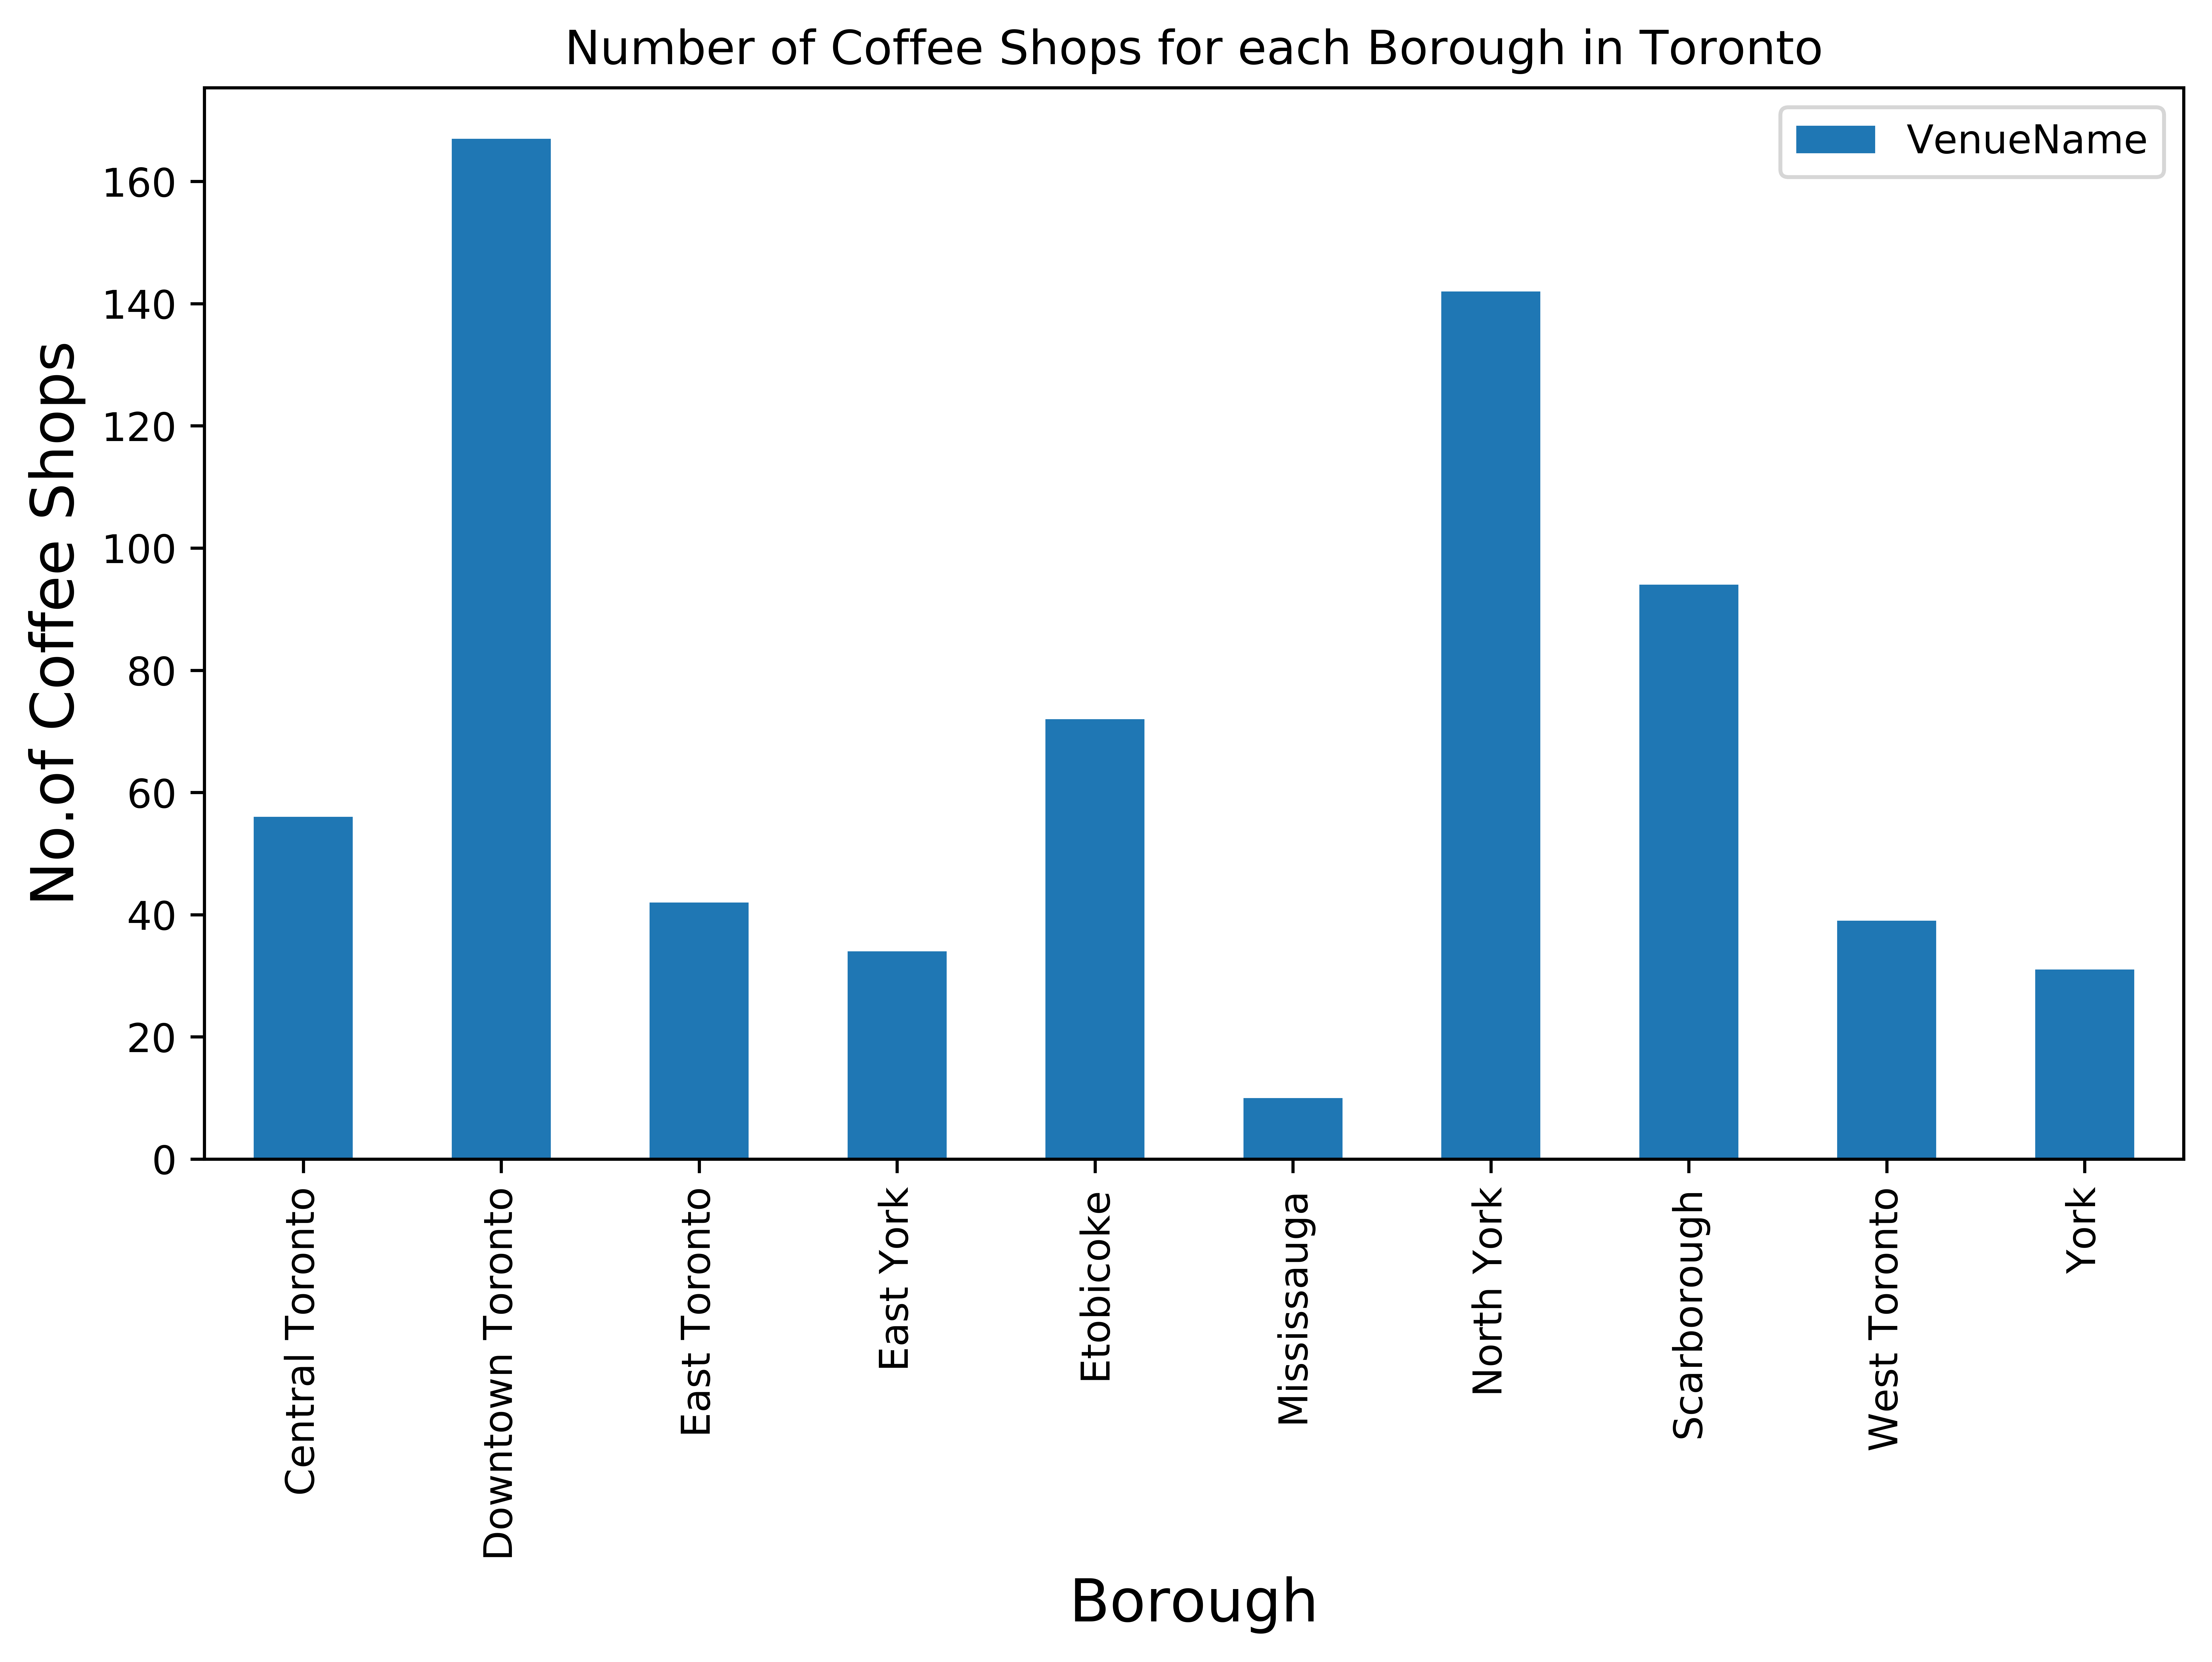

In [86]:
plt.figure(figsize=(9,5), dpi = 1000)
# title
plt.title('Number of Coffee Shops for each Borough in Toronto')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Coffee Shops', fontsize=15)
#giving a bar plot
coffeeshops.groupby('Borough')['VenueName'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

### From the above Bar Plot, we can see that Downtown Toronto has the highest number of Coffee shops and Mississauge has the lowest number of Coffee shops

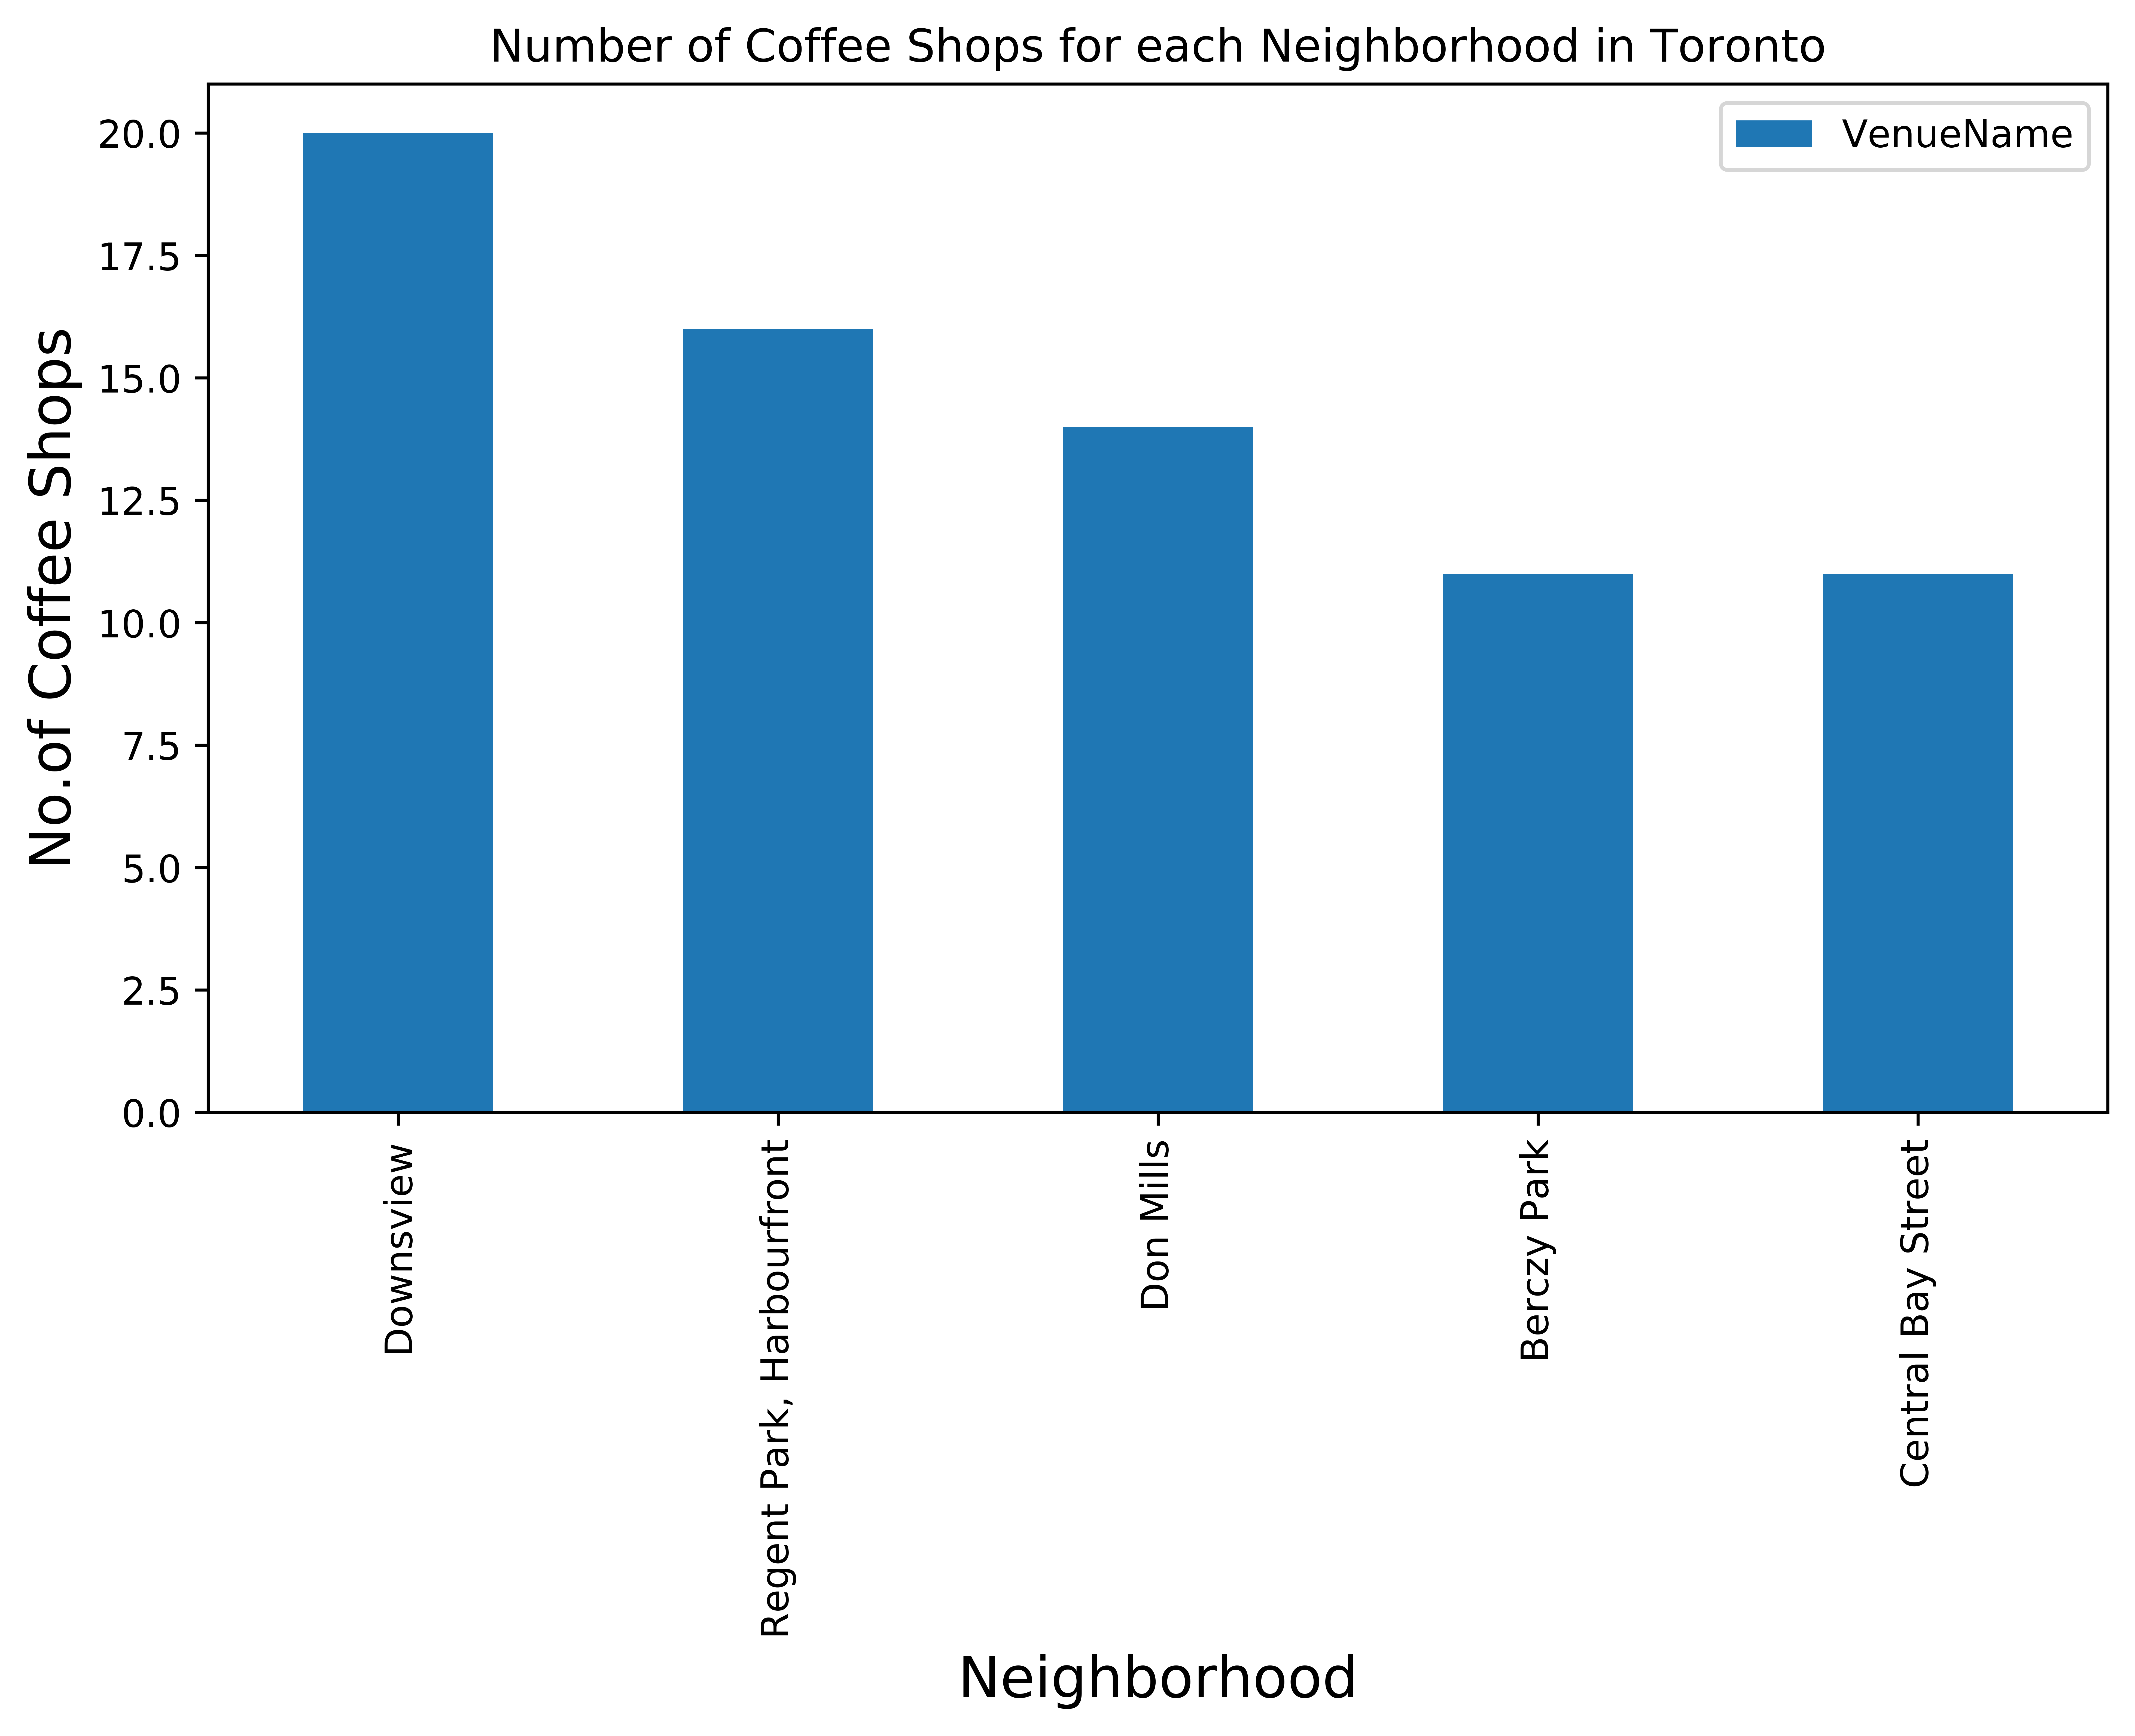

In [67]:
plt.figure(figsize=(9,5), dpi = 1000)
# title
plt.title('Number of Coffee Shops for each Neighborhood in Toronto')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Coffee Shops', fontsize=15)
#giving a bar plot
coffeeshops.groupby('Neighborhood')['VenueName'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [68]:
coffeeshops[coffeeshops['Neighborhood']=='Downsview']

,Borough,Neighborhood,VenueName,VenueCategory
2225,North York,Downsview,Tim Hortons,Coffee Shop
2238,North York,Downsview,Tim Hortons,Coffee Shop
2255,North York,Downsview,Tim Hortons,Coffee Shop
2258,North York,Downsview,Tim Hortons,Coffee Shop
2283,North York,Downsview,Coffee Time,Coffee Shop
2295,North York,Downsview,Tim Hortons,Coffee Shop
2308,North York,Downsview,Tim Hortons,Coffee Shop
2325,North York,Downsview,Tim Hortons,Coffee Shop
2328,North York,Downsview,Tim Hortons,Coffee Shop
2353,North York,Downsview,Coffee Time,Coffee Shop


### We can see that, Downsview in North York has the highest number of Coffee Shops with a total count of 20.

# Conclusions:
Form Above we can see the following:
- Most of the Coffee Shops are concentrated in downtown Toronto, with the number over 160. On the other hand, bar chart shows that Mississauge has the lowest number of Coffee shops.
- This represents a great opportunity and high potential areas to open new coffee shops in Mississauge as there is very little to no competition from existing coffee shops.
- If you want to get coffee more easier, live in Downsview,North York is a good choice.
***